# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset_mood_smartphone.csv', index_col=0)
df

,id,time,variable,value
1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [3]:
all_variables = df.variable.unique()
all_variables

array(['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather'],
      dtype=object)

**Column definitions**
- id: the user
- time: timestamp of measurement
- variable: measured entity
- value: value of the entity

In [4]:
# check number of users
users = df.id.unique()
print('users: ', users)
num_users = len(users)
print(f'There are {num_users} unique users.')

users:  ['AS14.01' 'AS14.02' 'AS14.03' 'AS14.05' 'AS14.06' 'AS14.07' 'AS14.08'
 'AS14.09' 'AS14.12' 'AS14.13' 'AS14.14' 'AS14.15' 'AS14.16' 'AS14.17'
 'AS14.19' 'AS14.20' 'AS14.23' 'AS14.24' 'AS14.25' 'AS14.26' 'AS14.27'
 'AS14.28' 'AS14.29' 'AS14.30' 'AS14.31' 'AS14.32' 'AS14.33']
There are 27 unique users.


<AxesSubplot:title={'center':'Entries per User'}, xlabel='User ID', ylabel='Number of Entries'>

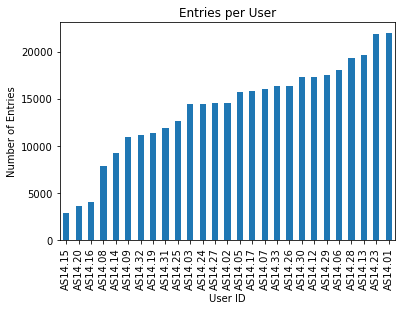

In [5]:
# check entries per user
df.groupby('id')['time'].count().sort_values().plot(kind='bar', xlabel= 'User ID', ylabel='Number of Entries', title='Entries per User')

In [6]:
# check span of time
times = df.sort_values('time')['time'].iloc[[0, -1]].values
print(f'Time runs between {times[0]} and {times[1]}.')


Time runs between 2014-02-17 07:00:52.197 and 2014-06-09 00:00:00.000.


<AxesSubplot:xlabel='date'>

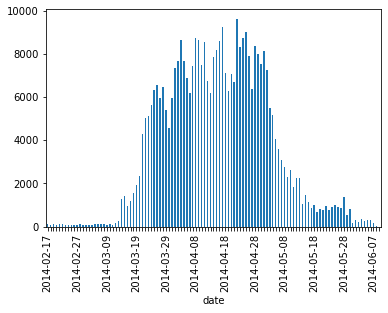

In [7]:
# check entries per date (extend with day of the week?)
df['time']= pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date

ax = df.groupby('date')['time'].count().plot(kind='bar')
ax.set_xticklabels([t if not i%10 else "" for i,t in enumerate(ax.get_xticklabels())])
ax

<AxesSubplot:xlabel='day'>

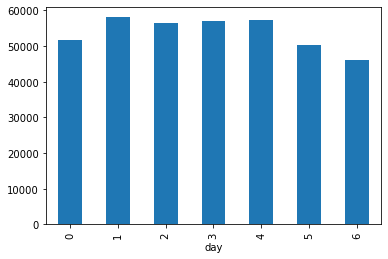

In [8]:
df['day'] = df['time'].dt.weekday
ax = df.groupby('day')['time'].count().plot(kind='bar')
ax

<AxesSubplot:xlabel='hours'>

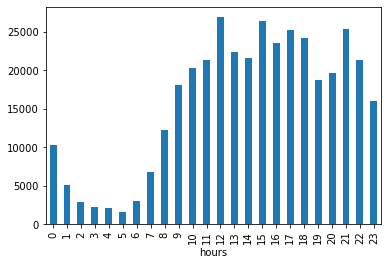

In [9]:
# check entries per hour of the day (regardless of date)
hours = df['time'].dt.hour
df['hours'] = hours
df.groupby('hours')['time'].count().plot(kind='bar')

<AxesSubplot:xlabel='variable'>

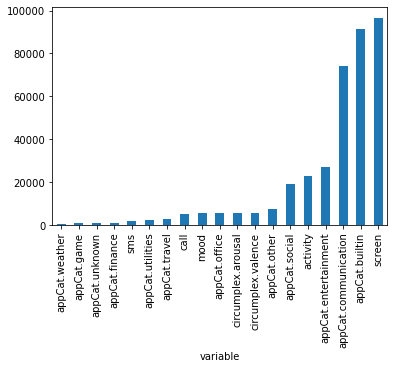

In [10]:
# check balance of entries per variable
df.groupby('variable')['time'].count().sort_values().plot(kind='bar')

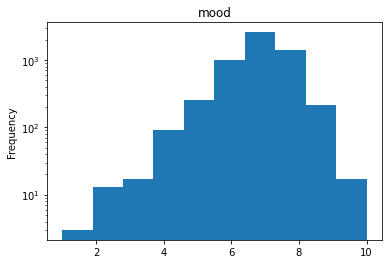

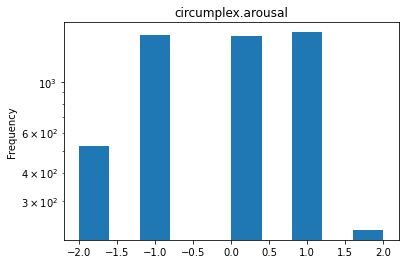

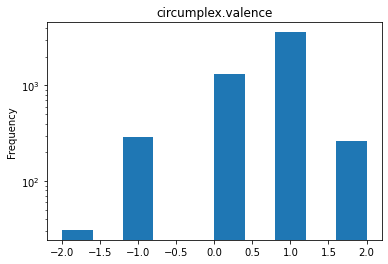

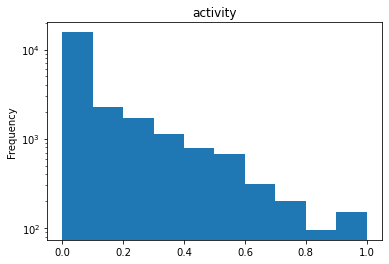

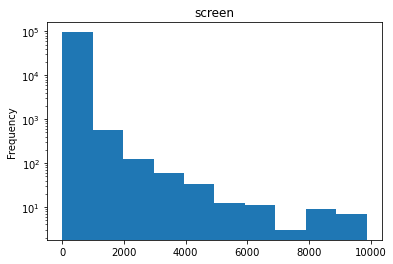

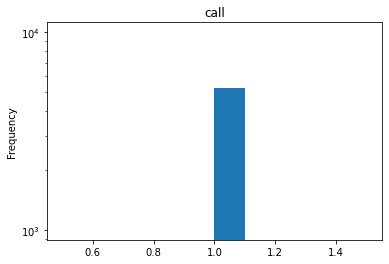

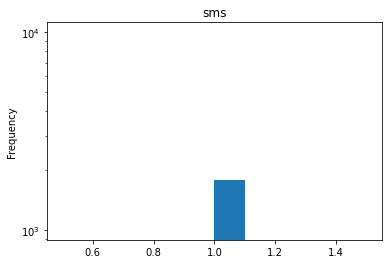

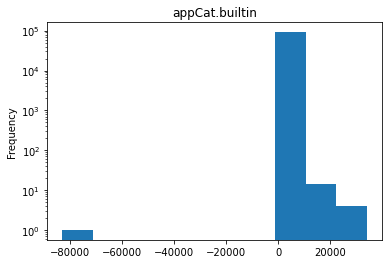

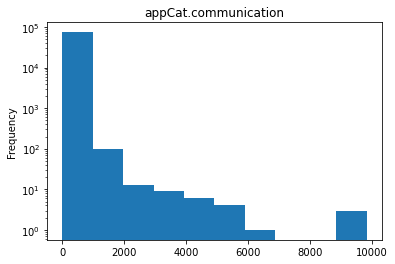

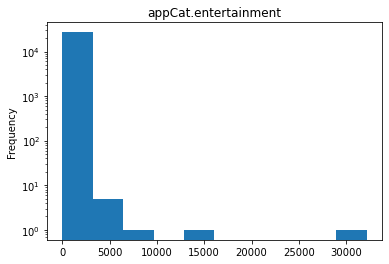

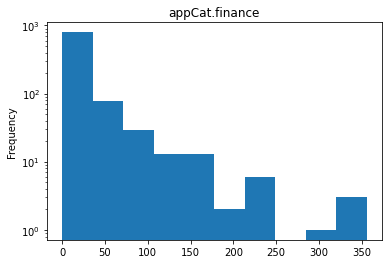

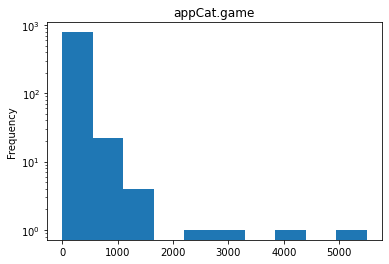

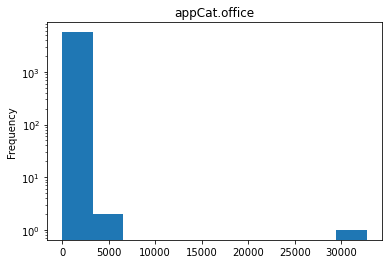

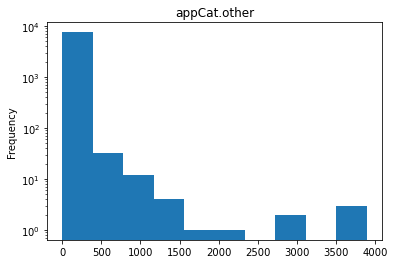

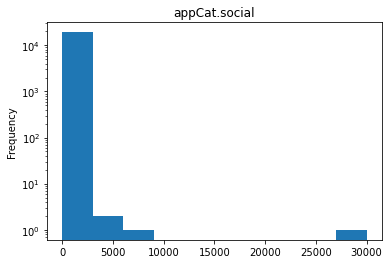

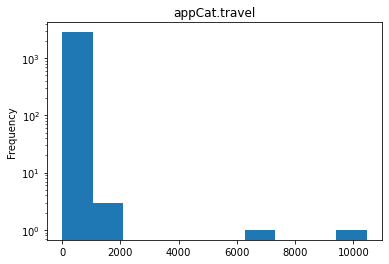

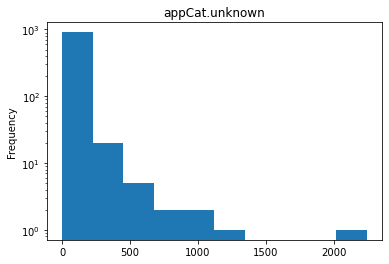

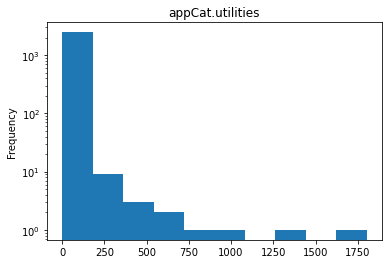

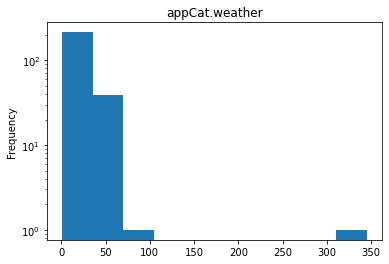

In [11]:
# check distribution and range of values per variable, to see outliers
for i, val in enumerate(df['variable'].unique()):
    df[df['variable'] == val].value.plot(kind='hist', title=val, logy=True)
    plt.show()

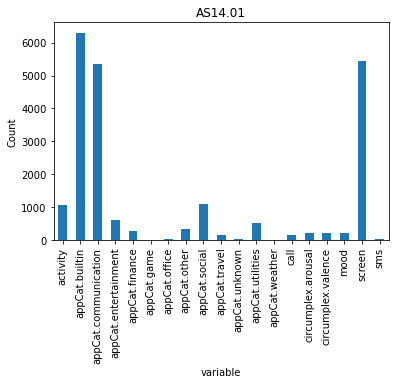

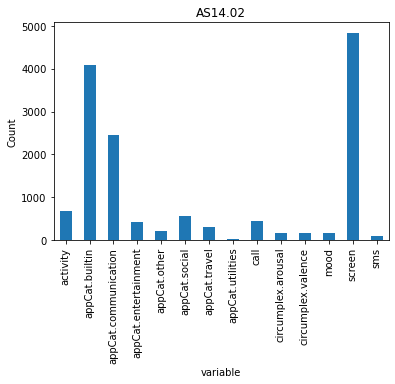

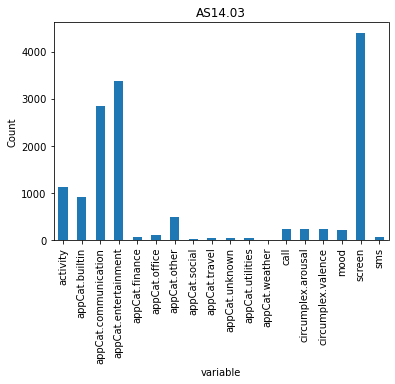

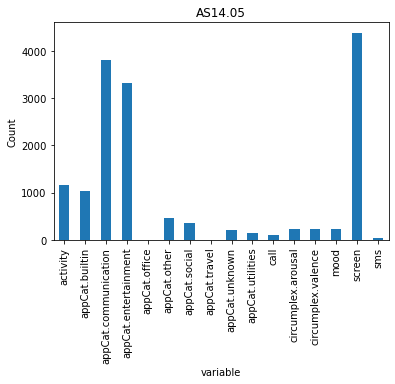

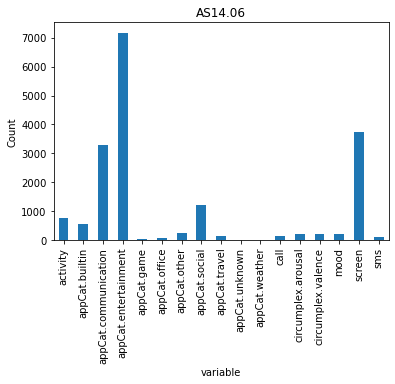

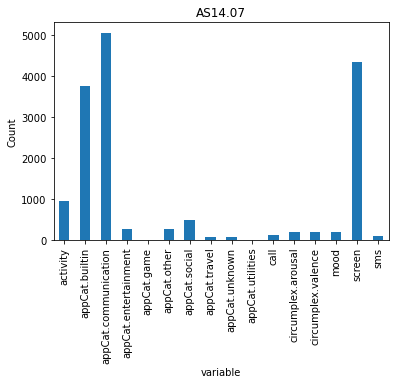

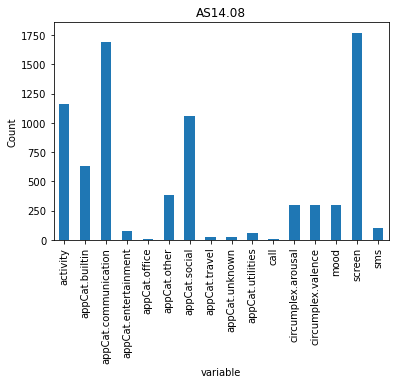

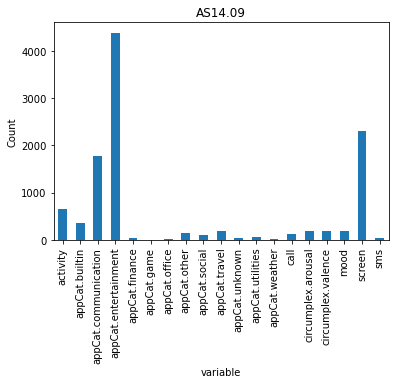

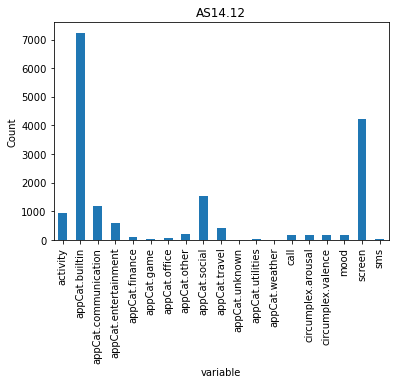

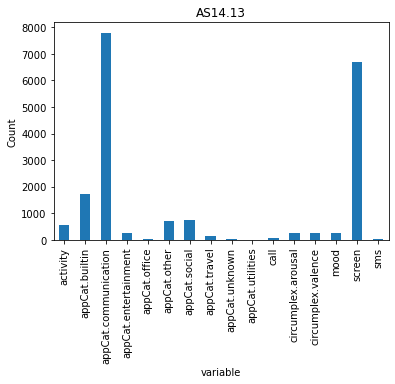

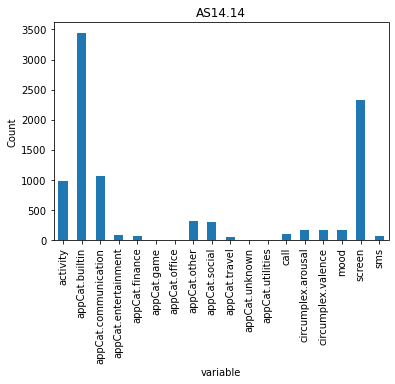

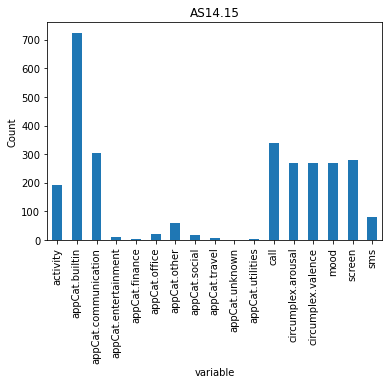

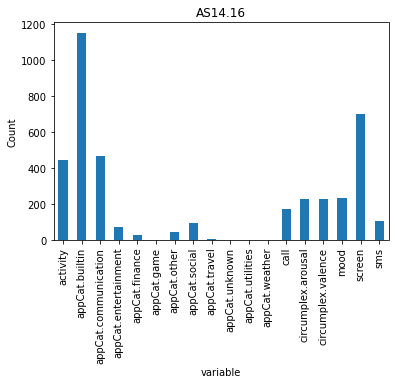

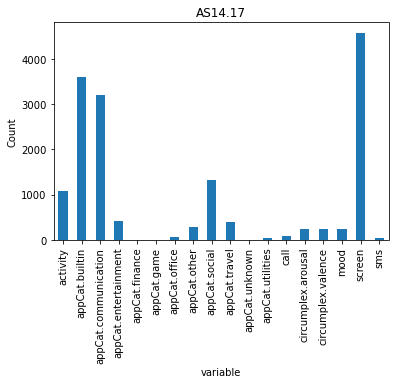

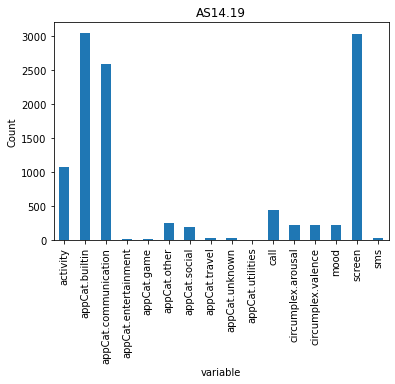

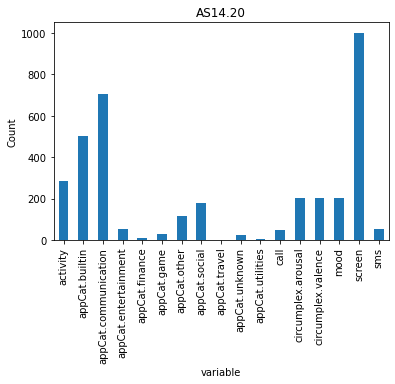

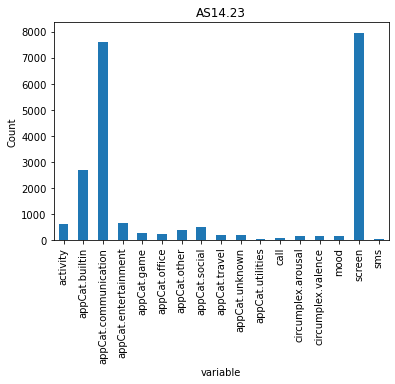

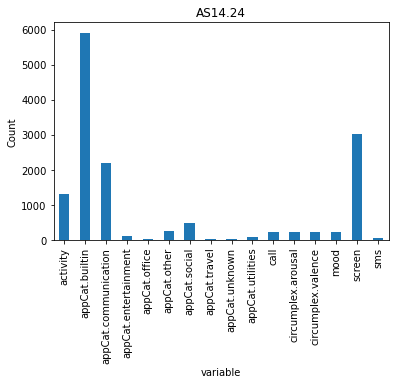

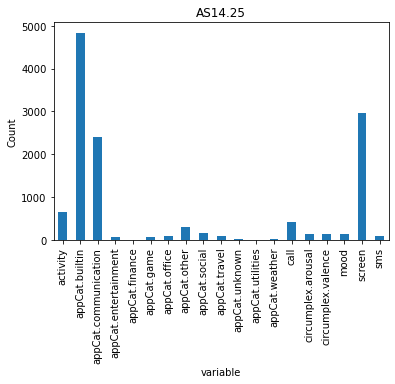

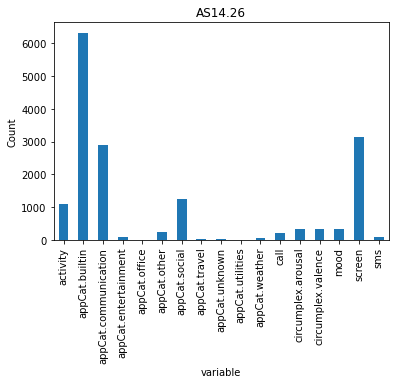

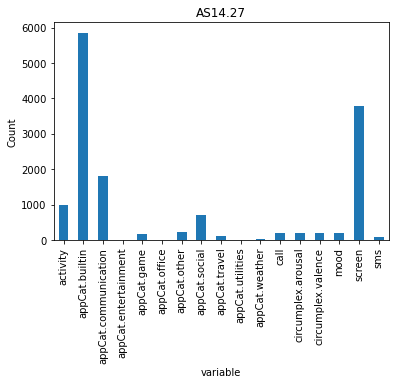

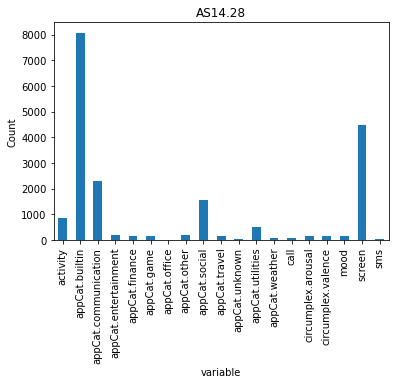

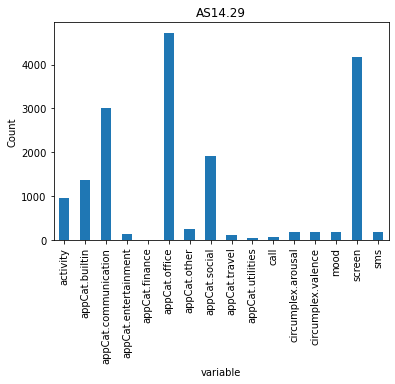

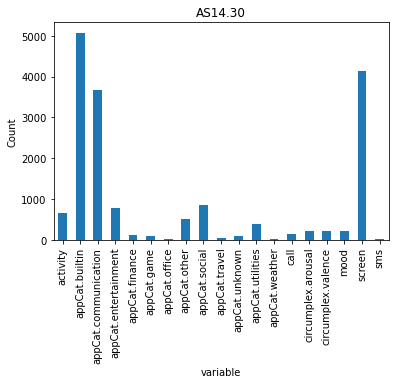

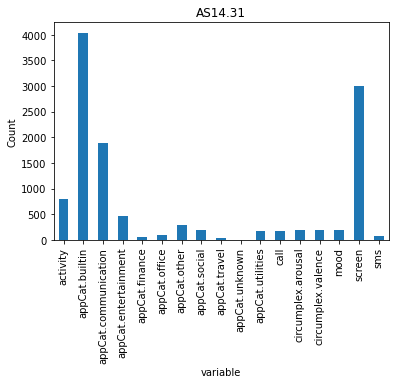

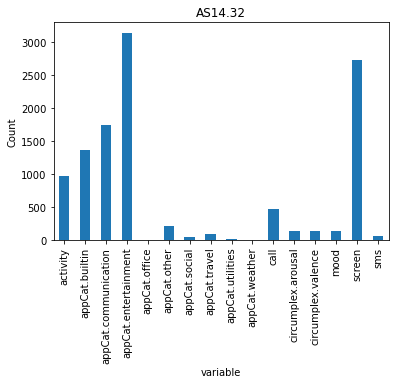

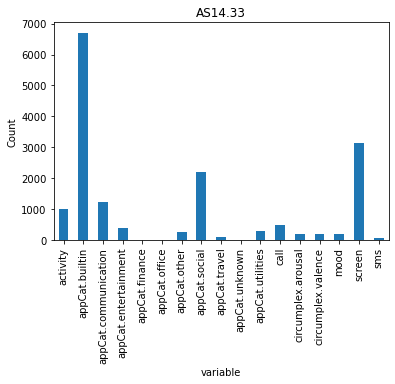

In [12]:
# check distribution of variables per user
for user in df['id'].unique():
    df[df['id'] == user].groupby('variable')['time'].count().plot(kind='bar', title=user, ylabel='Count')
    plt.show()
    

In [13]:
# check nan values per column
for column in df.columns:
    print(f'Column {column} has {len(df[df[column].isna()])} NaN-values.')

Column id has 0 NaN-values.
Column time has 0 NaN-values.
Column variable has 0 NaN-values.
Column value has 202 NaN-values.
Column date has 0 NaN-values.
Column day has 0 NaN-values.
Column hours has 0 NaN-values.


In [14]:
# check for variables whether they are measured (nearly) every day


In [15]:
# check how often 'mood' or other variables are measured
def count_per_variable(df):
    d = df.groupby(['variable','id'])['value'].count().unstack()
    d.plot(kind='bar',stacked=True, title = "counts per category per user")
    plt.legend(title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
 

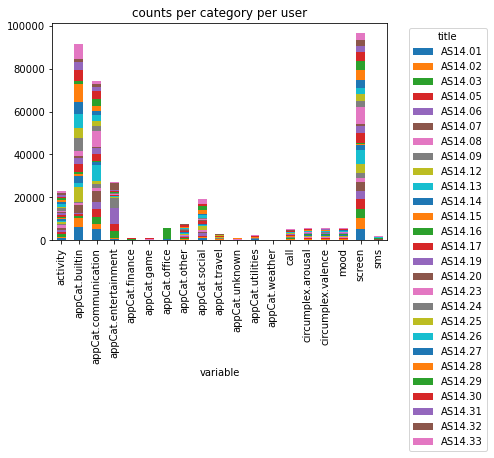

In [16]:
count_per_variable(df)

In [17]:
# check for which variable(s) NaN-values exist
variables_with_NaN = df[df.isna().any(axis=1)]['variable'].unique()
count_dict = {var: 0 for var in variables_with_NaN}

for var in variables_with_NaN:
    count_dict[var] = len(df[df['variable'] == var]) - df[df['variable'] == var].count()

print(count_dict)

{'circumplex.arousal': id           0
time         0
variable     0
value       46
date         0
day          0
hours        0
dtype: int64, 'circumplex.valence': id            0
time          0
variable      0
value       156
date          0
day           0
hours         0
dtype: int64}


In [18]:
# check for which user(s) NaN-values
users_with_NaN = df[df.isna().any(axis=1)]['id'].unique()

count_dict = {user: 0 for var in variables_with_NaN}

for user in users_with_NaN:
    count_dict[user] = len(df[df['id'] == user]['value']) - df[df['id'] == user]['value'].count()

print(count_dict)

{'AS14.33': 12, 'AS14.01': 17, 'AS14.05': 7, 'AS14.06': 3, 'AS14.07': 2, 'AS14.08': 3, 'AS14.09': 6, 'AS14.12': 10, 'AS14.15': 11, 'AS14.16': 43, 'AS14.17': 11, 'AS14.24': 35, 'AS14.25': 1, 'AS14.26': 2, 'AS14.28': 39}


In [19]:
# check mood value per day
def time_series_per_variable(df, variable):
    for user in users:
        temp_df = df[(df['id'] == user) & (df['variable'] == variable)]
        temp_df.set_index('date').plot(kind='line', title=user, ylabel='value')
        locs, labels = plt.xticks()
        plt.setp(labels, rotation=45)
        plt.show()

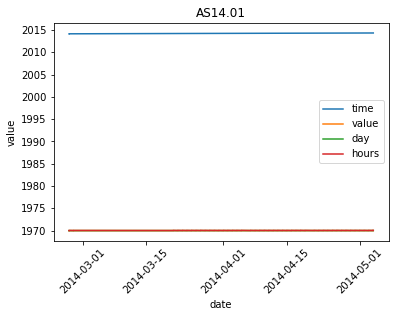

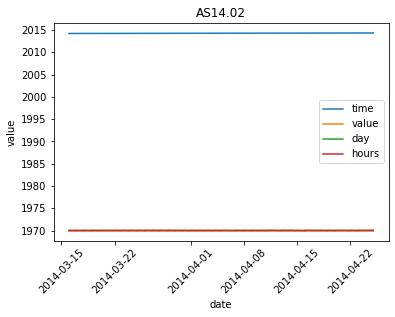

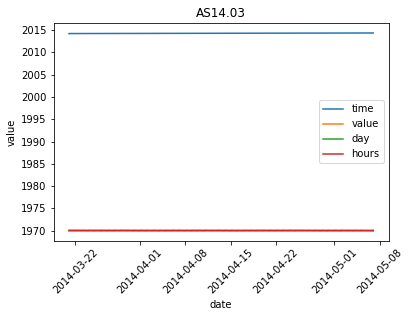

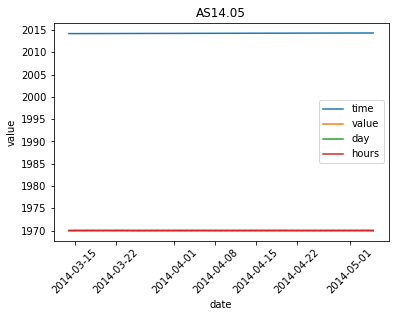

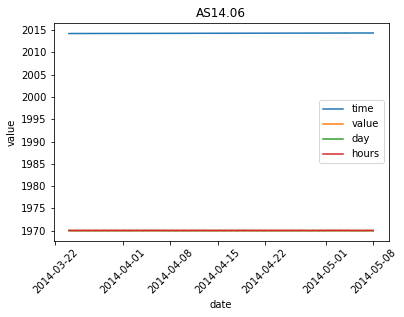

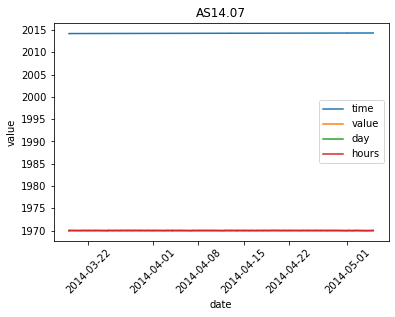

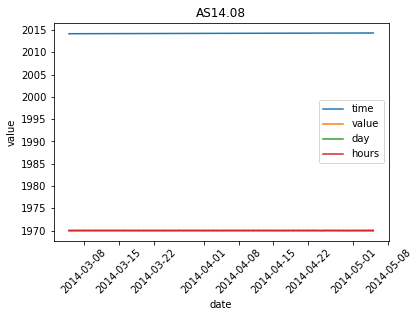

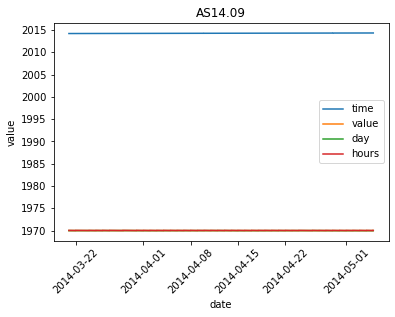

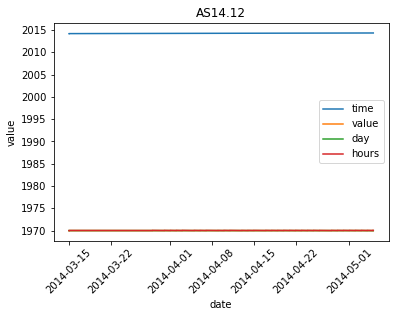

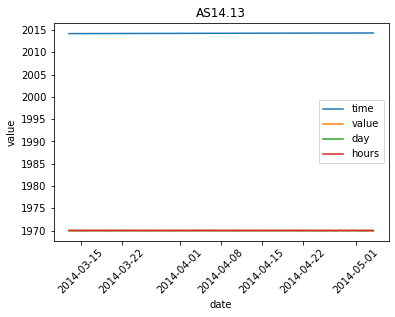

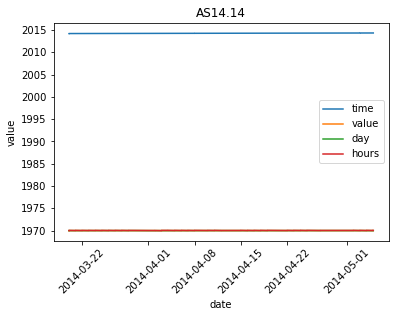

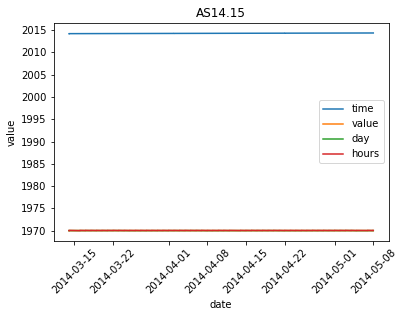

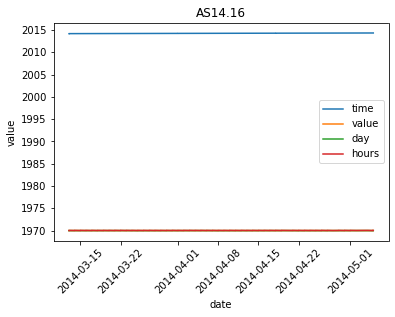

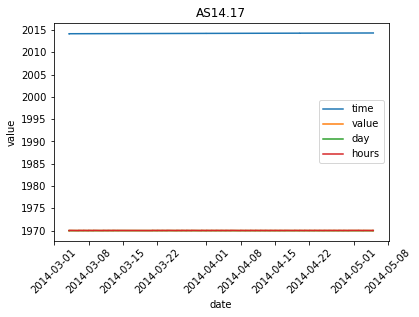

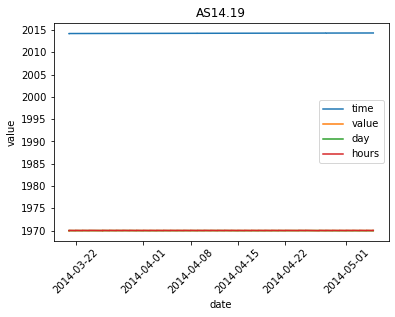

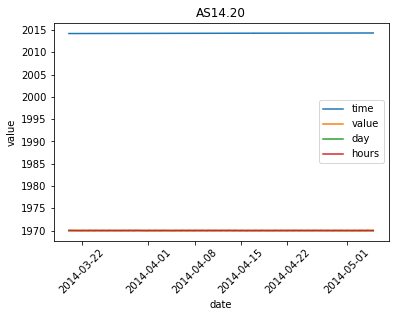

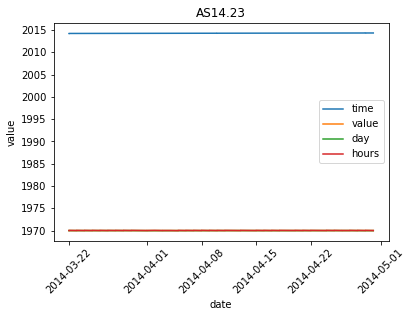

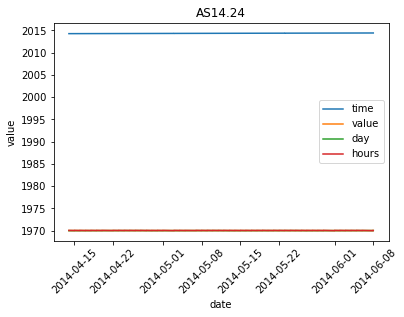

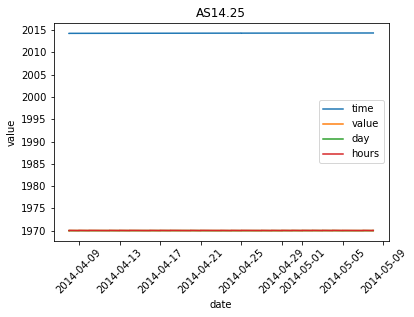

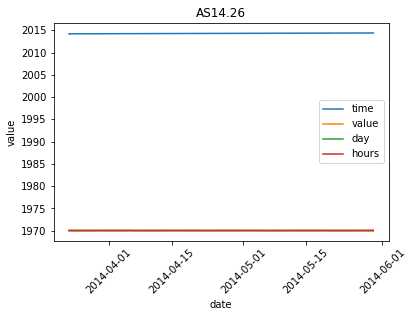

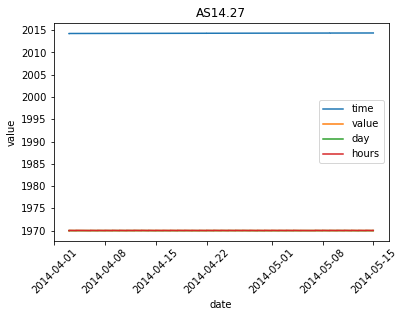

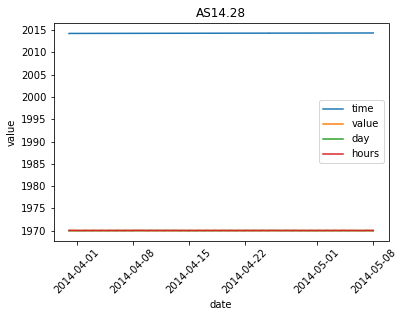

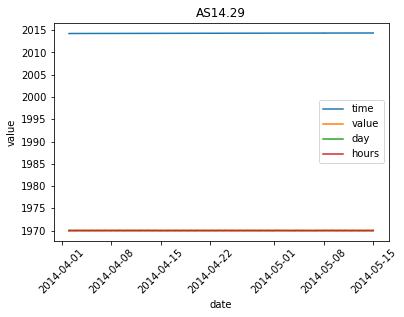

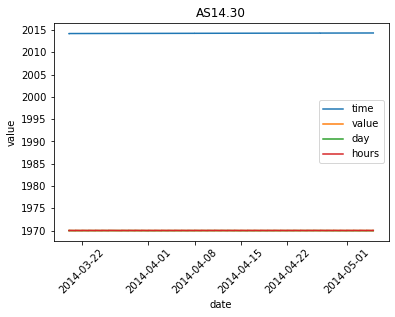

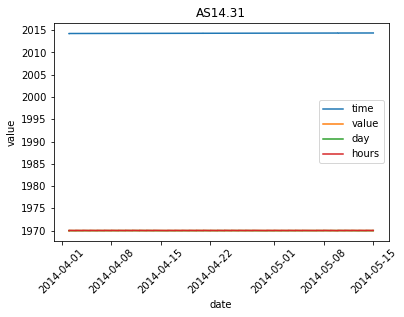

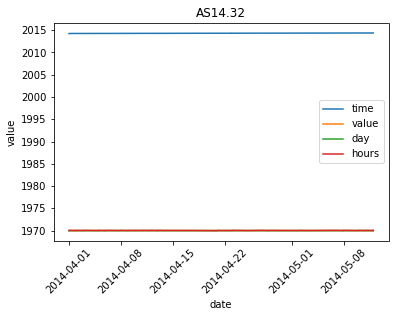

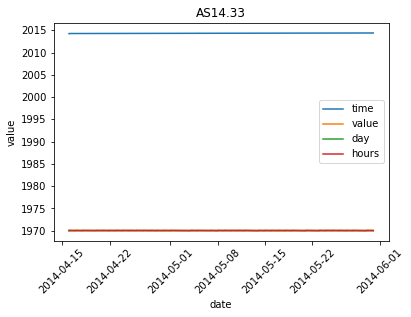

In [20]:
time_series_per_variable(df, 'mood')

In [21]:
for user in users:
    df['id']

In [22]:
# check how often values are measured every day